In [10]:
!pip install laspy numpy matplotlib open3d

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import laspy
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

In [ ]:
# Load LAS file
las = laspy.read("/home/inesh/LiDAR/NEONDSSampleLiDARPointCloud.las")

# Print metadata
print(f"Point count: {len(las.x)}")
print(f"Point format: {las.header.point_format}")
print(f"Bounding box: {las.header.min} to {las.header.max}")

Point count: 6609829
Point format: <PointFormat(1, 0 bytes of extra dims)>
Bounding box: [2.5600e+05 4.1110e+06 3.8466e+02] to [2.56999990e+05 4.11199999e+06 5.10250000e+02]


In [14]:
# Get X, Y, Z coordinates as a NumPy array
points = np.vstack((las.x, las.y, las.z)).T
print(f"First 5 points:\n{points[:5]}")


First 5 points:
[[2.56999540e+05 4.11199951e+06 4.62310000e+02]
 [2.56998860e+05 4.11199952e+06 4.62260000e+02]
 [2.56998190e+05 4.11199952e+06 4.62430000e+02]
 [2.56997510e+05 4.11199953e+06 4.62500000e+02]
 [2.56996830e+05 4.11199954e+06 4.62470000e+02]]


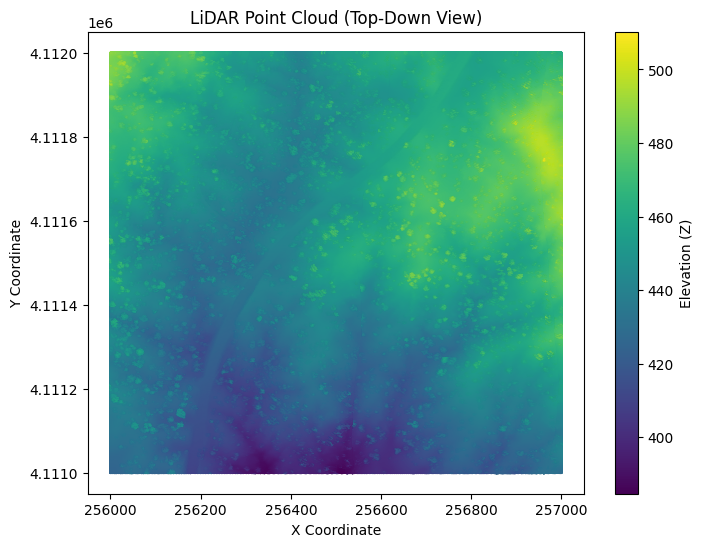

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2], cmap="viridis", s=1)
plt.colorbar(label="Elevation (Z)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("LiDAR Point Cloud (Top-Down View)")
plt.show()

In [22]:
import os
os.environ["XDG_SESSION_TYPE"] = "x11"

In [23]:

# Convert to Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Show interactive visualization
o3d.visualization.draw_geometries([pcd])

KeyboardInterrupt: 

In [24]:
filtered_points = points[points[:,2] > 10]

# Convert filtered points to Open3D format
pcd_filtered = o3d.geometry.PointCloud()
pcd_filtered.points = o3d.utility.Vector3dVector(filtered_points)

# Visualize filtered point cloud
o3d.visualization.draw_geometries([pcd_filtered])

In [25]:
out_las = laspy.create(point_format=las.header.point_format, file_version=las.header.version)

# Assign new filtered point data
out_las.x = filtered_points[:, 0]
out_las.y = filtered_points[:, 1]
out_las.z = filtered_points[:, 2]

# Save
out_las.write("filtered_output.las")
print("Filtered LAS file saved as filtered_output.las!")

Filtered LAS file saved as filtered_output.las!


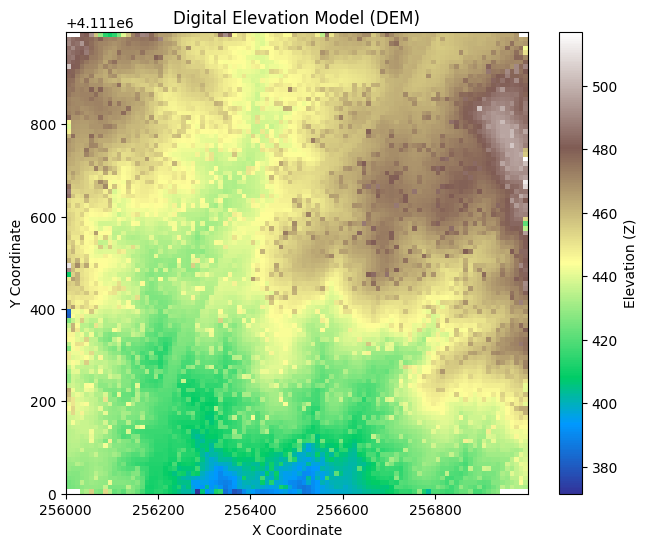

In [2]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load LAS file
las = laspy.read("/home/inesh/LiDAR/NEONDSSampleLiDARPointCloud.las")
points = np.vstack((las.x, las.y, las.z)).T

# Define grid size
grid_x, grid_y = np.mgrid[min(las.x):max(las.x):100j, min(las.y):max(las.y):100j]

# Interpolate using griddata
grid_z = griddata(points[:, :2], points[:, 2], (grid_x, grid_y), method='cubic')

# Plot the DEM
plt.figure(figsize=(8, 6))
plt.imshow(grid_z.T, extent=(min(las.x), max(las.x), min(las.y), max(las.y)), origin='lower', cmap='terrain')
plt.colorbar(label="Elevation (Z)")
plt.title("Digital Elevation Model (DEM)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()
